<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/A_simple_strategy_to_buy_and_sell_assets_with_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A strategy to buy and sell assets with SMA
In this notebook, I am showing a simple strategy to build a code to understand the changes in the prices of an asset in the stock market. The idea came from the [Computer Science Youtube Channel](https://www.youtube.com/c/ComputerSciencecompsci112358/playlists), in his channel, you will find a lot of good material to learn python and for free!

The work here is about to show all the steps that I have made to get signals or tendencies of when I could buy and sell assets with the help of the simple moving average to try to make profits. Here I am using the **Close price**  of **PETR4**, and for more information about the company, you can find it at their own website [Petrobras](https://petrobras.com.br/pt/).

<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/PTER4.png?raw=true" width = "50%">
</p>



**Disclaimer**: The material in this article is purely for educational purposes and should not be considered professional investment advice. Invest at your discretion!

The data for this work I got from [Yahoo Finance](https://br.financas.yahoo.com/quote/PETR4.SA/history/)

In [ ]:
# Description A simple moving average trading strategy using python

In [1]:
# Import the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Upload the file PETR4
from google.colab import files
files.upload()

> If you have any type of problem using the code above to upload the file, go to settings and enable the cookies.

In [3]:
# Store the data
df = pd.read_csv("PETR4.SA(2).csv")

# Save the date as the index
df = df.set_index(pd.DatetimeIndex(df.Date.values))

print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])


# Show the first five datas
df.head()

Number of rows:  246
Number of columns:  7


,Date,Open,High,Low,Close,Adj Close,Volume
2020-09-30,2020-09-30,19.500000,20.040001,19.430000,19.610001,17.905075,69505000.0
2020-10-01,2020-10-01,19.639999,20.059999,19.129999,19.850000,18.124210,77537300.0
2020-10-02,2020-10-02,19.730000,19.740000,19.020000,19.020000,17.366371,85306000.0
2020-10-05,2020-10-05,19.360001,20.160000,19.240000,20.030001,18.288561,73288500.0
2020-10-06,2020-10-06,20.469999,20.700001,19.930000,19.930000,18.197254,77064600.0


In [4]:
# Identifying the type of variables
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

**Handling the Date column**

The variable `Date` is like the type of object and this is a problem, and to solve that problem, I am going to use the method `to_datetime()` to change this variable to date time type. 

In [5]:
# Transform the column Date in Datetime type
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")

In [6]:
# Check
df.Date

2020-09-30   2020-09-30
2020-10-01   2020-10-01
2020-10-02   2020-10-02
2020-10-05   2020-10-05
2020-10-06   2020-10-06
                ...    
2021-09-23   2021-09-23
2021-09-24   2021-09-24
2021-09-27   2021-09-27
2021-09-28   2021-09-28
2021-09-29   2021-09-29
Name: Date, Length: 246, dtype: datetime64[ns]

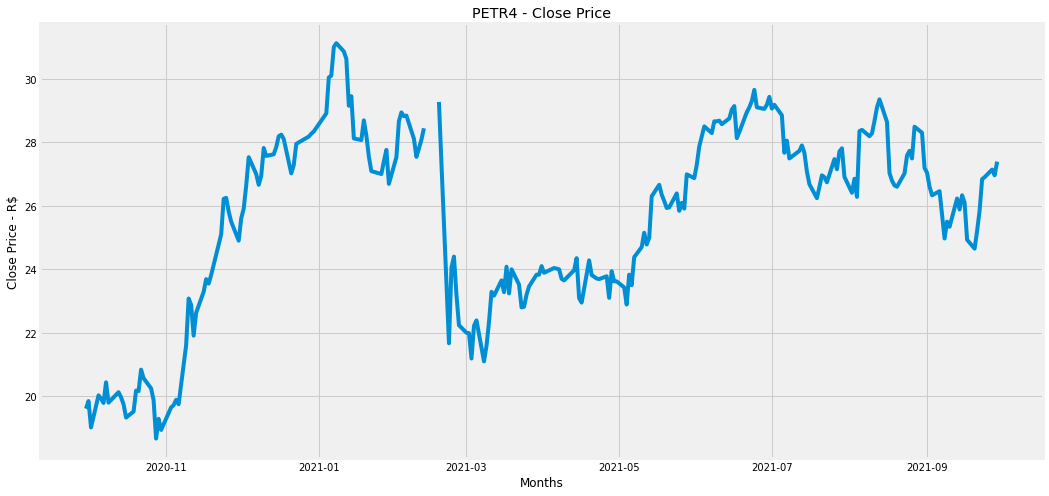

In [12]:
# Plot the Close price column
plt.figure(figsize=(16,8))
plt.title("PETR4 - Close Price")
plt.plot(df.Date, df.Close)
plt.xlabel('Months')
plt.ylabel('Close Price - R$')
plt.show()

## **Simple Moving Average - SMA**

A simple moving average (SMA) is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average. We usually use the close price.

* A simple moving average is a technical indicator that helps to understand if an asset price will continue to rise or not. 

$$SMA = \frac{A_1 + A_2 + A_3 + ... + A_n}{n}$$

**Where:**

> **A** = The Close price of the asset at the period *n*

> **n** = The number of total periods





In [8]:
# Fuction to take the average price of the dataset
# Simple Moving Average = SMA 
def SMA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

In [9]:
# Build a new column to store the SMA data
df["SMA30"] = SMA(df)

In [10]:
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA30
2020-09-30,2020-09-30,19.500000,20.040001,19.430000,19.610001,17.905075,69505000.0,NaN
2020-10-01,2020-10-01,19.639999,20.059999,19.129999,19.850000,18.124210,77537300.0,NaN
2020-10-02,2020-10-02,19.730000,19.740000,19.020000,19.020000,17.366371,85306000.0,NaN
2020-10-05,2020-10-05,19.360001,20.160000,19.240000,20.030001,18.288561,73288500.0,NaN
2020-10-06,2020-10-06,20.469999,20.700001,19.930000,19.930000,18.197254,77064600.0,NaN
...,...,...,...,...,...,...,...,...
2021-09-23,2021-09-23,25.950001,26.950001,25.910000,26.840000,26.840000,84480600.0,26.740333
2021-09-24,2021-09-24,26.549999,27.059999,26.469999,26.900000,26.900000,44821500.0,26.667000
2021-09-27,2021-09-27,27.139999,27.459999,26.500000,27.139999,27.139999,89178700.0,26.593333
2021-09-28,2021-09-28,27.190001,27.889999,26.719999,26.959999,26.959999,117874300.0,26.537333


### **The strategy**

The strategy is simple when the value of the simple moving average exceeds the value of the closing price, it is an indication of buying and that the stock is discounted! 

Now when the closing price is greater than the moving average value, what I'm going to do is sell the asset to make a profit on the transaction.

And if neither of those two conditions happens, I'll just stick to the position I'm in at the moment.



<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/risco.jpg?raw=true" width = "50%">
</p>


In [11]:
# Strategey function
def strategy(df):
  buy = []
  sell = []
  flag = 0
  buy_price = 0

  for i in range(0,len(df)):

    if df['SMA30'][i] > df['Close'][i] and flag == 0:
     buy.append(df['Close'][i])
     sell.append(np)
     buy_price = df['Close'][i]
     flag = 1
    elif df['SMA30'][i] < df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
     sell.append(df['Close'][i])
     buy.append(np.nan)
     buy_price = 0
     flag = 0
    else:
     sell.append(np.nan)
     buy.append(np.nan)

  return (buy,sell)
   


In [13]:
# Get the buy and sell list
stra = strategy(df)
df['Buy'] = stra[0]
df['Sell'] = stra[1]

In [14]:
# The missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

Buy          0.975610
Sell         0.951220
SMA30        0.239837
Volume       0.004065
Adj Close    0.004065
Close        0.004065
Low          0.004065
High         0.004065
Open         0.004065
Date         0.000000
dtype: float64

In [15]:
# Type of the columns
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
SMA30               float64
Buy                 float64
Sell                 object
dtype: object

As we can see the  `Sell` column appears as an object type and to transform into float we have to user the `to_numeric` method, the documetation is acessable at [Pandas- to_numeric](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html?highlight=to_numeric#pandas.to_numeric) or in portugues [To_numeric](https://www.delftstack.com/pt/howto/python-pandas/pandas-convert-object-to-float/)

In [16]:
# Converting the Sale column to float
df['Sell'] = pd.to_numeric(df['Sell'],errors = 'coerce')

In [19]:
# Info about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2020-09-30 to 2021-09-29
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       246 non-null    datetime64[ns]
 1   Open       245 non-null    float64       
 2   High       245 non-null    float64       
 3   Low        245 non-null    float64       
 4   Close      245 non-null    float64       
 5   Adj Close  245 non-null    float64       
 6   Volume     245 non-null    float64       
 7   SMA30      187 non-null    float64       
 8   Buy        6 non-null      float64       
 9   Sell       6 non-null      float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 21.1 KB
None


### Graph for the Buy & Sell signals


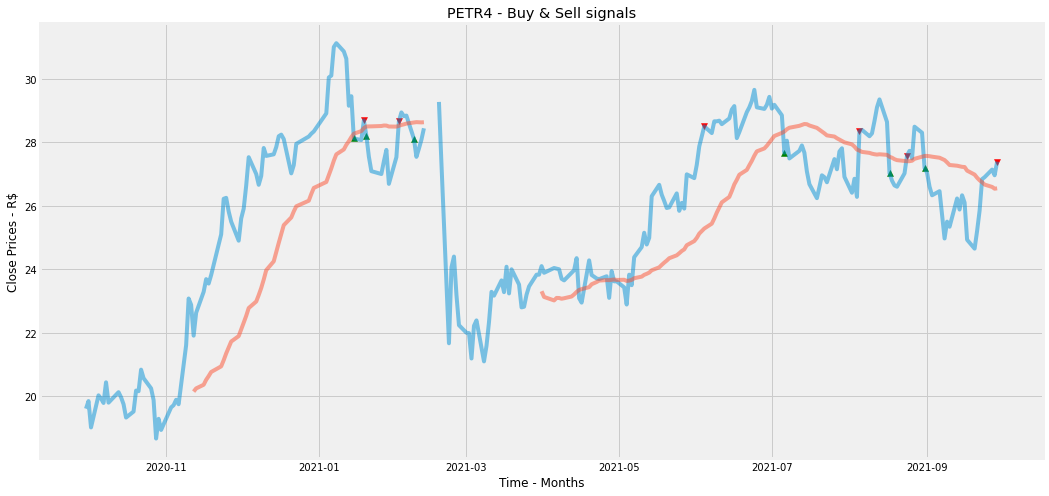

In [20]:
# Visualize the close price and the the bull and sell signs
plt.figure(figsize=(16,8))
plt.title("PETR4 - Buy & Sell signals")
plt.plot(df['Close'], alpha = 0.5, label = "Close")
plt.plot(df['SMA30'], alpha = 0.5, label = "SMA 30")
plt.scatter(df.index, df['Buy'], color = 'green', label = "Buy Signal", marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = "Sell Signal", marker = 'v', alpha = 1)
plt.xlabel('Time - Months')
plt.ylabel('Close Prices - R$')
plt.show()

### **Analysis of the Graphic**

The strategy works great to generate some income, but as the graphic shows, we lost some opportunities to make money too!
As we can see in the chart above, there are moments when the markets closing price continued to rise and I had already sold the position in the asset, that is, maybe it sold cheaply.


---
### **Conclusion**

* The first is that the code works and the graph shows the entry and exit points if we follow the moving average.
* The second is that relying solely on the moving average is not ideal when trying to optimize profit from trading.